In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import norm
import numpy as np

In [3]:
tfidf_sp_scores = pd.read_excel('sp_scores.xlsx', index_col=0)
wfidf_sp_scores = pd.read_excel('sp_scores_wfidf.xlsx', index_col=0)

In [4]:
scores_raw = tfidf_sp_scores.copy()
scores_raw = scores_raw.drop(columns=['Rank', 'ticker', 'Company'])

In [5]:
scores_raw

,innovation,integrity,quality,respect,teamwork
0,128.740245,34.752974,170.006334,57.302786,42.783258
1,38.719608,11.482933,75.706047,86.634095,27.973512
2,178.298709,4.750019,157.240676,2.269639,75.364677
3,197.386537,10.988663,135.213942,12.206706,47.816887
4,40.228884,2.747879,32.684059,0.808345,27.158737
...,...,...,...,...,...
427,139.097367,45.089499,208.713906,39.654025,102.243386
428,68.603196,26.013571,99.466774,16.448915,53.262500
429,51.888385,22.957740,79.539717,34.800364,71.548489
430,45.400157,5.062751,83.599136,4.276790,31.200402


In [6]:
scores_raw.describe()

,innovation,integrity,quality,respect,teamwork
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,73.997783,24.372735,90.077063,16.303583,51.332891
std,56.847529,40.656610,65.482193,24.055816,46.266493
min,0.826943,0.734128,1.428219,0.067362,2.444514
25%,39.298431,8.400841,51.422982,6.290540,24.191923
50%,58.522584,15.342212,71.793040,10.751836,39.155406
75%,92.929715,28.040575,107.924798,18.827294,60.349609
max,518.320936,500.347150,576.171357,305.620371,494.968798


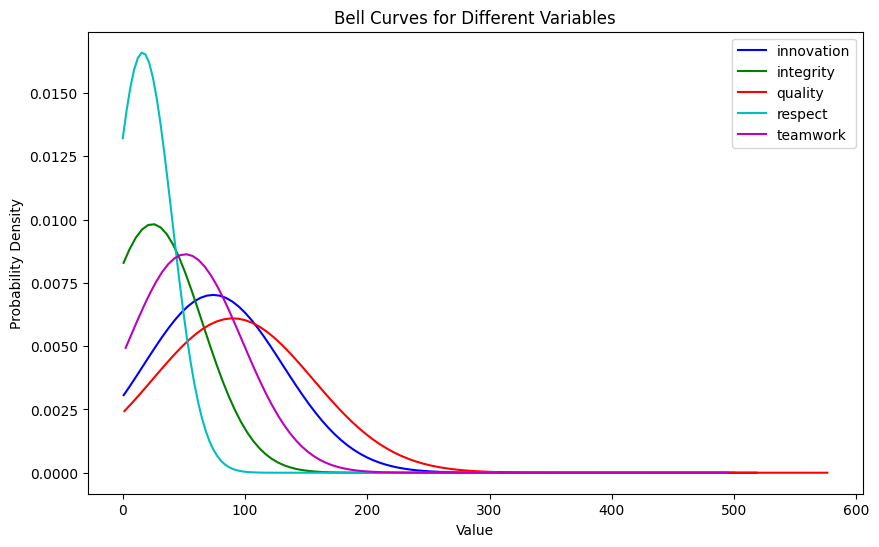

In [18]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm']
labels = scores_raw.columns

for i, column in enumerate(scores_raw.columns):
    variable = scores_raw[column]
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(variable)
    
    # Plot the PDF
    xmin, xmax = min(variable), max(variable)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, color=colors[i], label=labels[i])

# Add title and labels
plt.title('Bell Curves for Raw Scores')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
# Ensure the input DataFrame contains only numerical values
if not np.issubdtype(scores_raw.values.dtype, np.number):
    raise ValueError("DataFrame should contain only numerical values.")

# Apply the natural logarithm transformation
scores_log = scores_raw.applymap(lambda x: np.log(x) if x > 0 else np.nan)

print("Original DataFrame:")
print(scores_raw.head())

print("\nLog-transformed DataFrame:")
print(scores_log.head())

Original DataFrame:
   innovation  integrity     quality    respect   teamwork
0  128.740245  34.752974  170.006334  57.302786  42.783258
1   38.719608  11.482933   75.706047  86.634095  27.973512
2  178.298709   4.750019  157.240676   2.269639  75.364677
3  197.386537  10.988663  135.213942  12.206706  47.816887
4   40.228884   2.747879   32.684059   0.808345  27.158737

Log-transformed DataFrame:
   innovation  integrity   quality   respect  teamwork
0    4.857797   3.548265  5.135836  4.048349  3.756147
1    3.656346   2.440862  4.326858  4.461693  3.331258
2    5.183460   1.558149  5.057778  0.819621  4.322339
3    5.285164   2.396864  4.906858  2.501985  3.867379
4    3.694585   1.010829  3.486887 -0.212767  3.301699


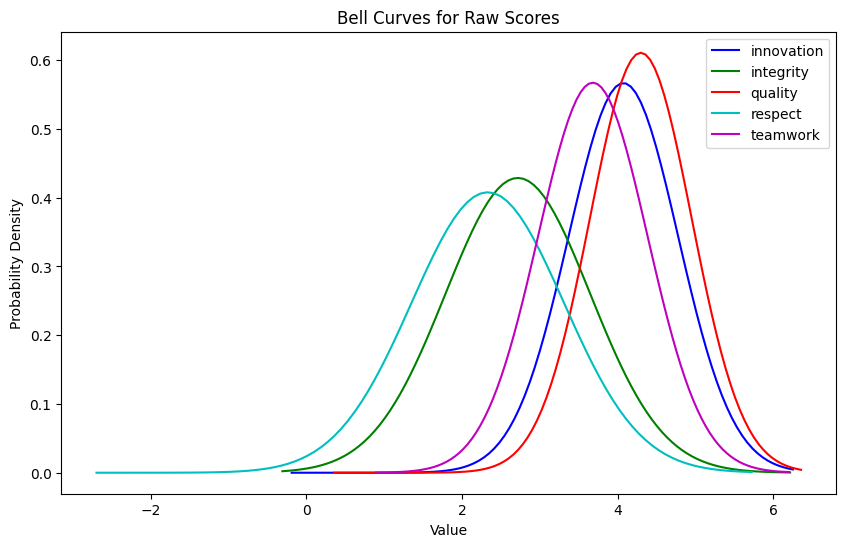

In [22]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm']
labels = scores_log.columns

for i, column in enumerate(scores_log.columns):
    variable = scores_log[column]
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(variable)
    
    # Plot the PDF
    xmin, xmax = min(variable), max(variable)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, color=colors[i], label=labels[i])

# Add title and labels
plt.title('Bell Curves for Raw Scores')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [23]:
scores_log.describe()

,innovation,integrity,quality,respect,teamwork
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,4.073034,2.716911,4.296877,2.330183,3.680626
std,0.704901,0.931850,0.654034,0.979458,0.704247
min,-0.190019,-0.309071,0.356428,-2.697673,0.893846
25%,3.671183,2.128331,3.940085,1.839045,3.186018
50%,4.069413,2.730607,4.273787,2.375070,3.667539
75%,4.531843,3.333650,4.681432,2.935304,4.100138
max,6.250595,6.215302,6.356405,5.722344,6.204495


In [9]:
# clipping deata (replacing values above a certain threshold with the threshold value)
scores_clipped = scores_log.copy()
scores_clipped['innovation'] = scores_clipped['innovation'].where(scores_clipped['innovation'] >= 250, 250)
scores_clipped['integrity'] = scores_clipped['integrity'].where(scores_clipped['integrity'] >= 100, 100)
scores_clipped['quality'] = scores_clipped['quality'].where(scores_clipped['quality'] >= 300, 300)
scores_clipped['respect'] = scores_clipped['respect'].where(scores_clipped['respect'] >= 75, 75)
scores_clipped['teamwork'] = scores_clipped['teamwork'].where(scores_clipped['teamwork'] >= 170, 170)

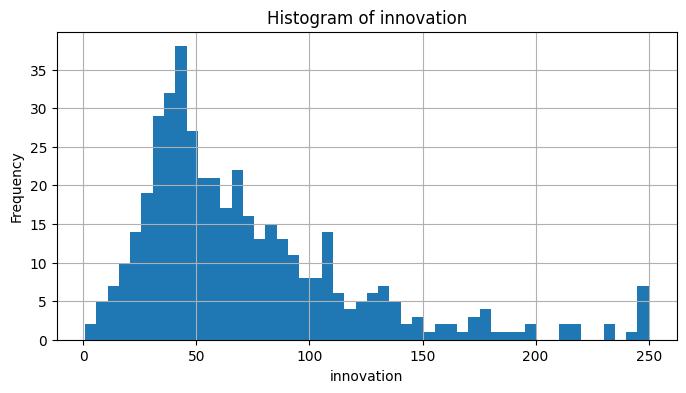

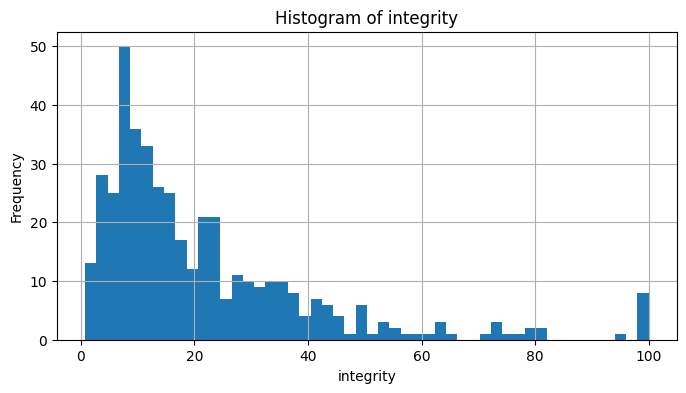

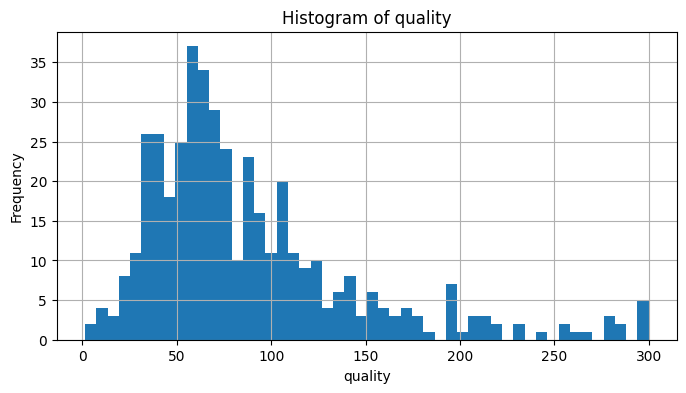

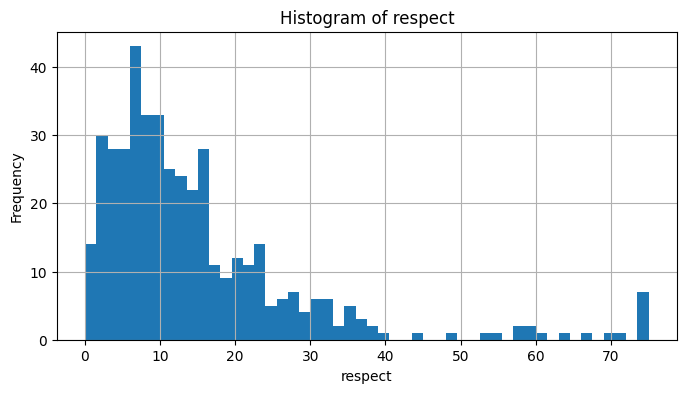

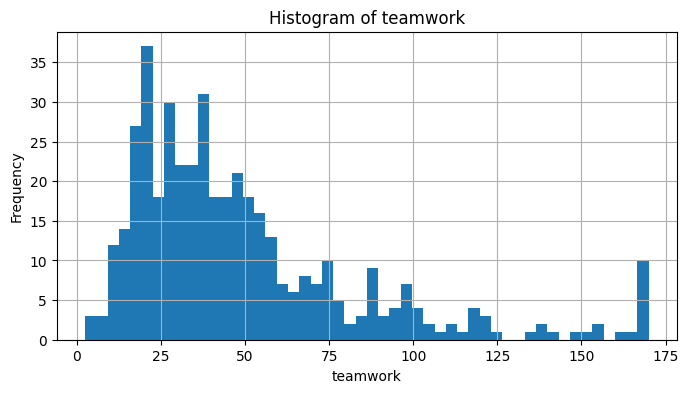

In [10]:
# Histograms of clipped data

for column in scores_clipped.columns:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scores_clipped[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [11]:
scores_clipped.describe()

,innovation,integrity,quality,respect,teamwork
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,72.451192,21.502013,88.521359,14.953956,49.285623
std,49.070253,19.619550,57.334019,14.051835,35.233941
min,0.826943,0.734128,1.428219,0.067362,2.444514
25%,39.298431,8.400841,51.422982,6.290540,24.191923
50%,58.522584,15.342212,71.793040,10.751836,39.155406
75%,92.929715,28.040575,107.924798,18.827294,60.349609
max,250.000000,100.000000,300.000000,75.000000,170.000000


In [12]:
scaleMinMax = MinMaxScaler(feature_range=(0, 5))
scaleStandard = StandardScaler()

In [13]:
scaled_rawScores_minmax = scaleMinMax.fit_transform(scores_raw) # Fit and transform the raw scores
scaled_clippedScores_minmax = scaleMinMax.fit_transform(scores_clipped) # Fit and transform the clipped scores

scaled_rawScores_standard = scaleStandard.fit_transform(scores_raw) # Fit and transform the raw scores
scaled_clippedScores_standard = scaleStandard.fit_transform(scores_clipped) # Fit and transform the clipped scores

In [14]:
scaled_rawScores_minmax = pd.DataFrame(scaled_rawScores_minmax, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame
scaled_rawScores_minmax['tickers'] = sp_scores['ticker']
scaled_clippedScores_minmax = pd.DataFrame(scaled_clippedScores_minmax, columns=scores_clipped.columns) # Convert the scaled scores to a DataFrame
scaled_clippedScores_minmax['tickers'] = sp_scores['ticker']

scaled_rawScores_standard = pd.DataFrame(scaled_rawScores_standard, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame
scaled_rawScores_standard['tickers'] = sp_scores['ticker']
scaled_clippedScores_standard = pd.DataFrame(scaled_clippedScores_standard, columns=scores_clipped.columns) # Convert the scaled scores to a DataFrame
scaled_clippedScores_standard['tickers'] = sp_scores['ticker']

NameError: name 'sp_scores' is not defined

In [ ]:
scaled_clippedScores_minmax

,innovation,integrity,quality,respect,teamwork,tickers
0,2.566756,1.713522,2.823075,3.819125,1.203743,msft
1,0.760368,0.541415,1.243886,5.000000,0.761807,aapl
2,3.561215,0.202280,2.609296,0.146950,2.176000,nvda
3,3.944239,0.516519,2.240428,0.810017,1.353951,amzn
4,0.790654,0.101432,0.523423,0.049443,0.737494,meta
...,...,...,...,...,...,...
427,2.774586,2.234170,3.471287,2.641483,2.978084,para
428,1.360024,1.273320,1.641792,1.093085,1.516452,mhk
429,1.024618,1.119398,1.308086,2.317615,2.062122,bio
430,0.894423,0.218032,1.376066,0.280881,0.858100,fox


In [ ]:
scaled_rawScores_minmax.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,432.000,432.000,432.000,432.000,432.000
mean,0.707,0.237,0.771,0.266,0.496
std,0.549,0.407,0.570,0.394,0.470
min,0.000,0.000,0.000,0.000,0.000
25%,0.372,0.077,0.435,0.102,0.221
50%,0.557,0.146,0.612,0.175,0.373
75%,0.890,0.273,0.926,0.307,0.588
max,5.000,5.000,5.000,5.000,5.000


In [ ]:
scaled_clippedScores_minmax.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,432.000,432.000,432.000,432.000,432.000
mean,1.437,1.046,1.458,0.993,1.398
std,0.985,0.988,0.960,0.938,1.051
min,0.000,0.000,0.000,0.000,0.000
25%,0.772,0.386,0.837,0.415,0.649
50%,1.158,0.736,1.178,0.713,1.095
75%,1.848,1.375,1.783,1.252,1.728
max,5.000,5.000,5.000,5.000,5.000


In [ ]:
scaled_clippedScores_standard.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,432.000,432.000,432.000,432.000,432.000
mean,-0.000,0.000,-0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.461,-1.060,-1.521,-1.061,-1.331
25%,-0.676,-0.669,-0.648,-0.617,-0.713
50%,-0.284,-0.314,-0.292,-0.299,-0.288
75%,0.418,0.334,0.339,0.276,0.314
max,3.622,4.006,3.693,4.278,3.430


In [ ]:
scaled_rawScores_standard.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,432.000,432.000,432.000,432.000,432.000
mean,0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.289,-0.582,-1.355,-0.676,-1.058
25%,-0.611,-0.393,-0.591,-0.417,-0.587
50%,-0.273,-0.222,-0.280,-0.231,-0.264
75%,0.333,0.090,0.273,0.105,0.195
max,7.825,11.721,7.432,12.041,9.600


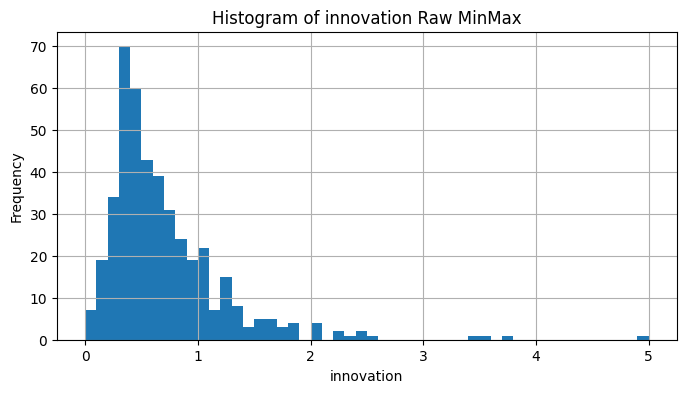

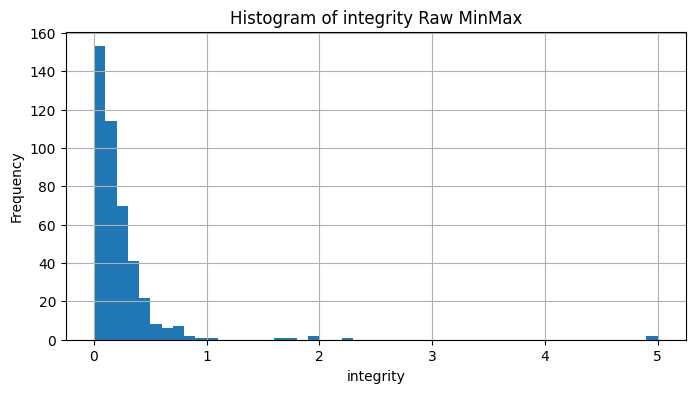

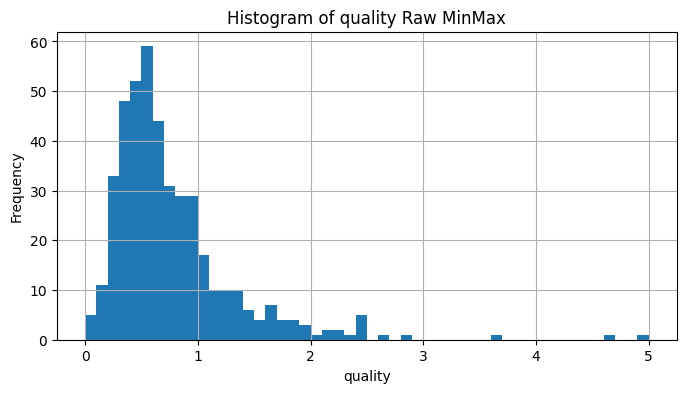

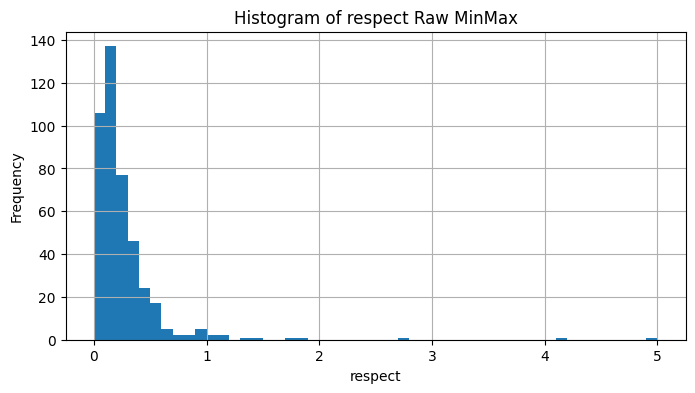

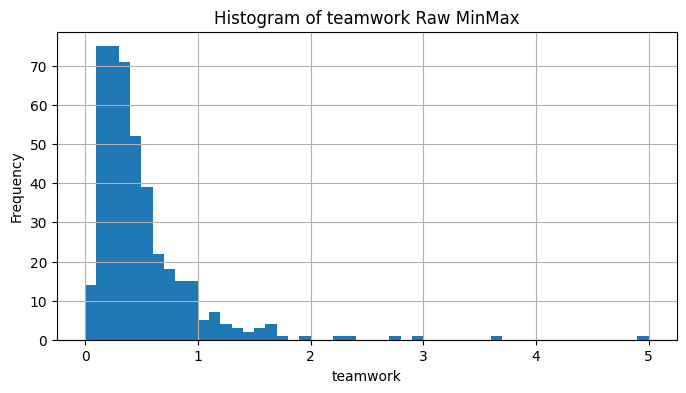

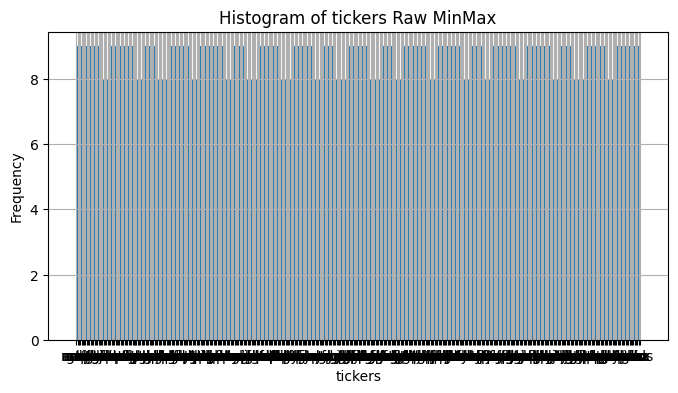

In [ ]:
for column in scaled_rawScores_minmax.columns:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scaled_rawScores_minmax[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column} Raw MinMax')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

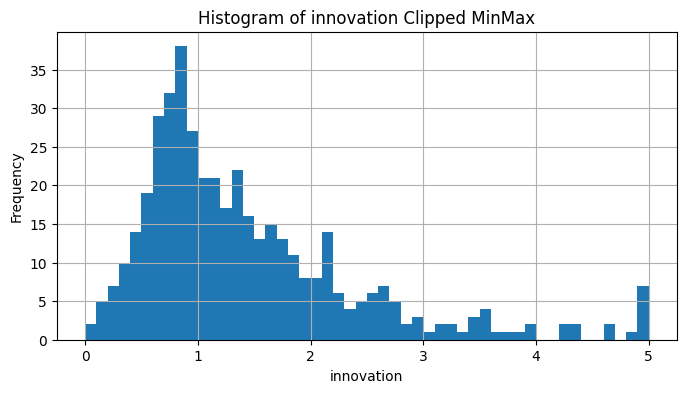

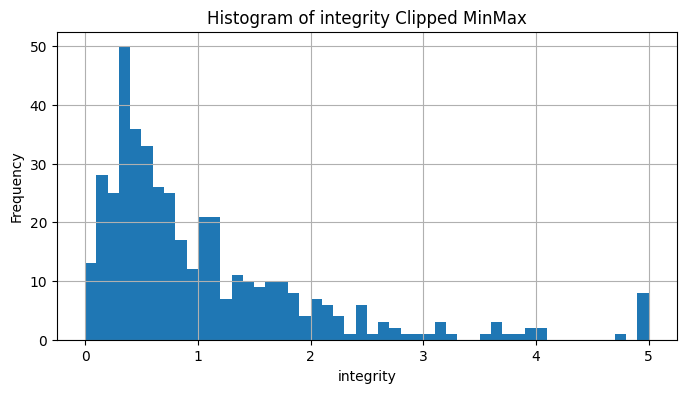

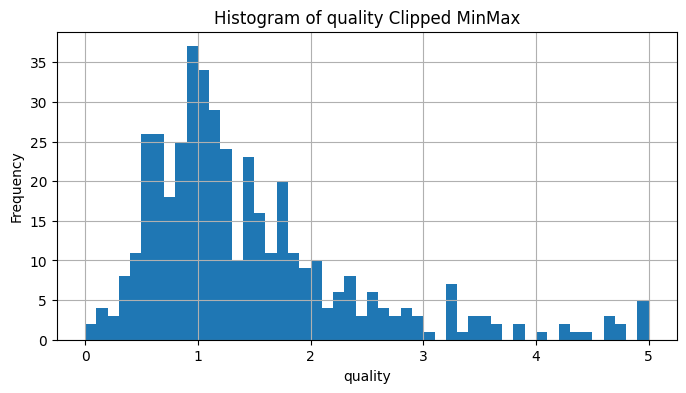

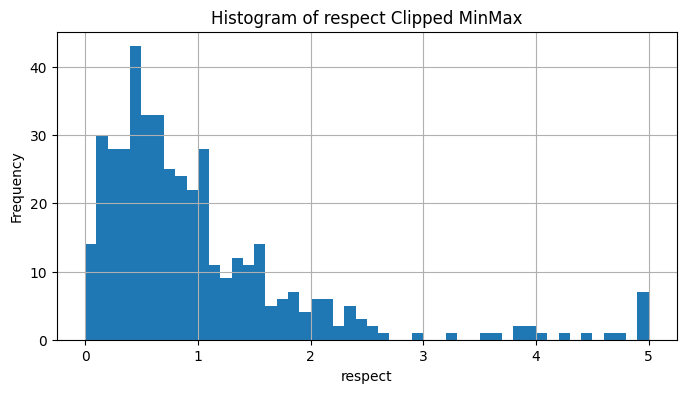

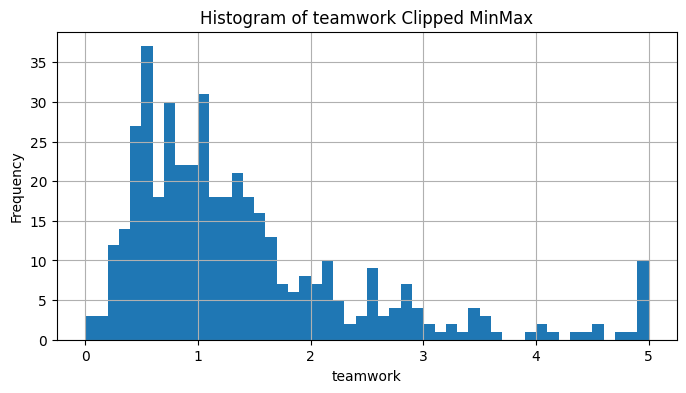

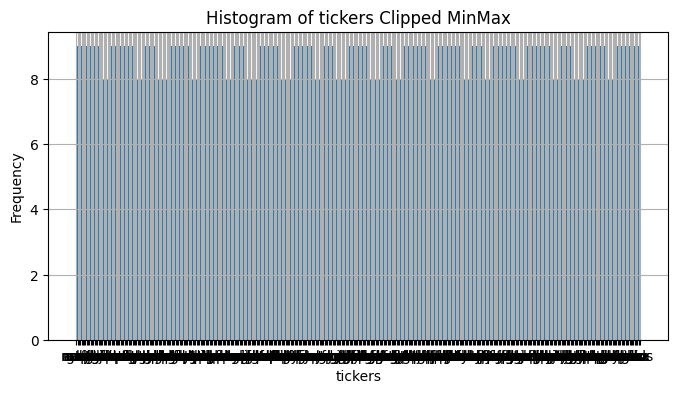

In [ ]:
for column in scaled_clippedScores_minmax.columns:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scaled_clippedScores_minmax[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column} Clipped MinMax')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
for column in scaled_clippedScores_minmax.columns:
    plt.figure(figsize=(8, 4))  # Specify the figure size for each histogram
    scaled_clippedScores_minmax[column].hist(bins=50)  # You can adjust the number of bins
    plt.title(f'Histogram of {column} Clipped MinMax')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
#scaled_clippedScores_minmax.to_excel('scaled_clippedScores_minmax.xlsx')